In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('netflix_titles.csv')

# Data Description

In [27]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [28]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Data Cleaning and Preparation

In [30]:

df.dropna(subset=['date_added', 'release_year'], inplace=True)
df['date_added'] = df['date_added'].str.strip() 
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df['content_type'] = df['type']

#### Clean duration column (extract numeric values)


In [31]:
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_unit'] = np.where(df['type'] == 'Movie', 'min', 'seasons')


#### Fill missing values for certain columns

In [32]:
df['country'].fillna('Unknown', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)

# Exploratory Data Analysis

#### Content Distribution


C:\Users\adham\AppData\Local\Temp\ipykernel_29416\4192360613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='content_type', data=df, palette='viridis')


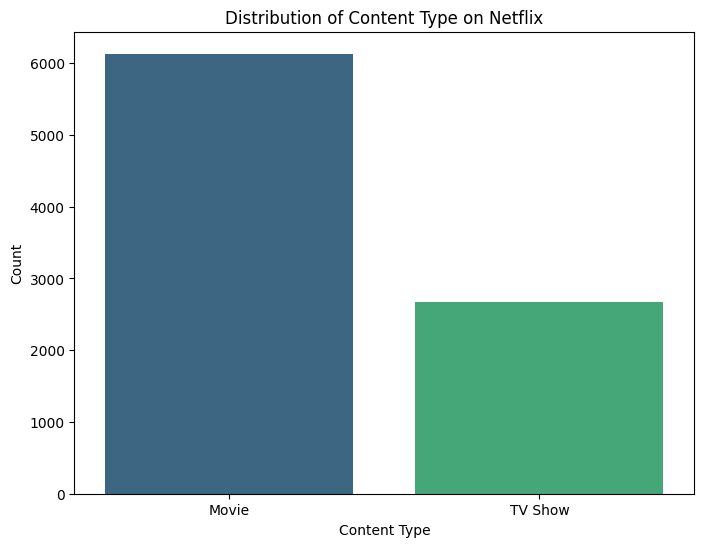

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='content_type', data=df, palette='viridis')
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

#### Content Release Patterns

C:\Users\adham\AppData\Local\Temp\ipykernel_29416\2007865451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month_added', data=df, palette='coolwarm')


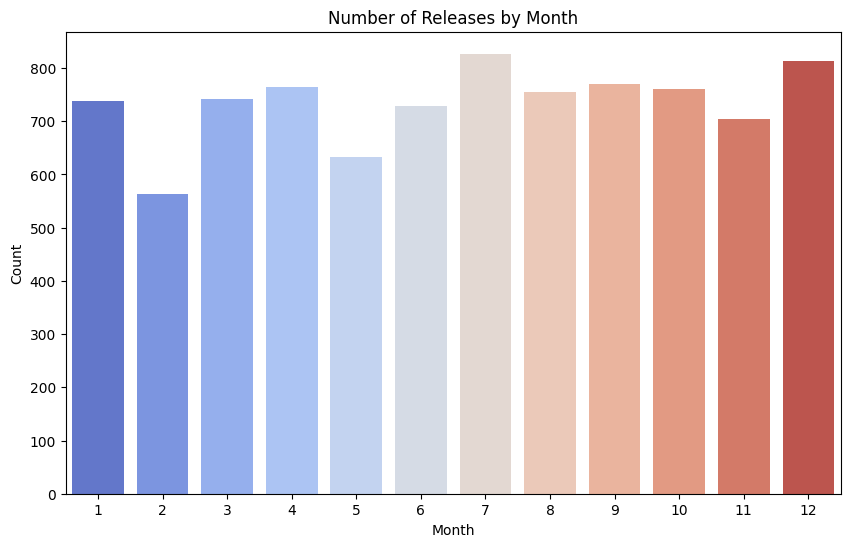

C:\Users\adham\AppData\Local\Temp\ipykernel_29416\2007865451.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, palette='coolwarm')


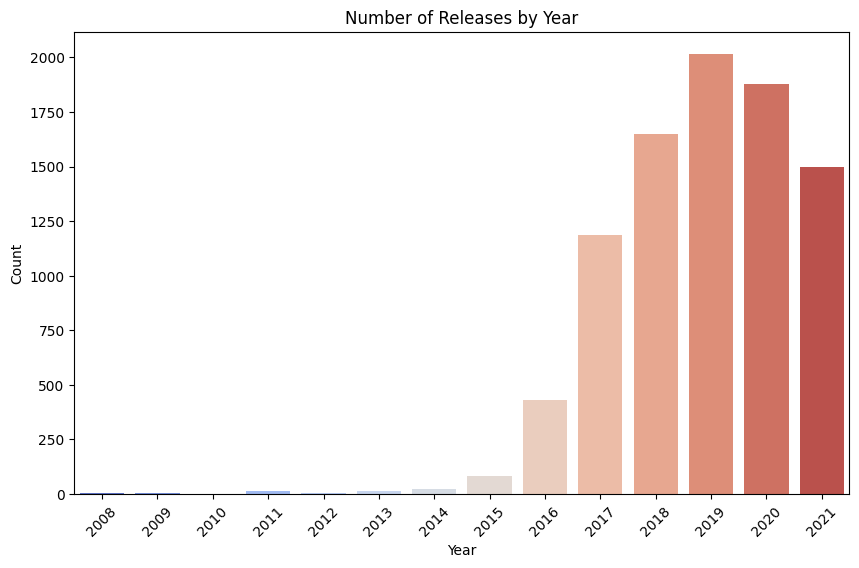

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month_added', data=df, palette='coolwarm')
plt.title('Number of Releases by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.title('Number of Releases by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Top Countries by Content

C:\Users\adham\AppData\Local\Temp\ipykernel_29416\2672013408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries_filtered.index, x=top_countries_filtered.values, palette='magma')


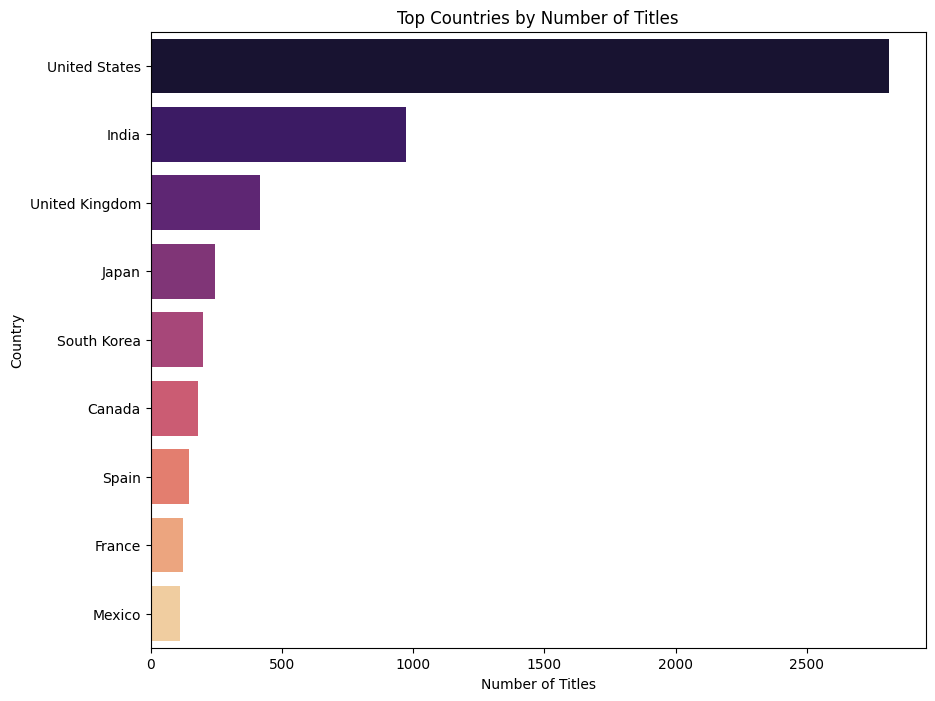

In [35]:
plt.figure(figsize=(10, 8))
top_countries_filtered = top_countries[top_countries.index != 'Unknown']
sns.barplot(y=top_countries_filtered.index, x=top_countries_filtered.values, palette='magma')
plt.title('Top Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

#### Content Duration Analysis

C:\Users\adham\AppData\Local\Temp\ipykernel_29416\1110383106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='content_type', y='duration', data=df, palette='Set2')


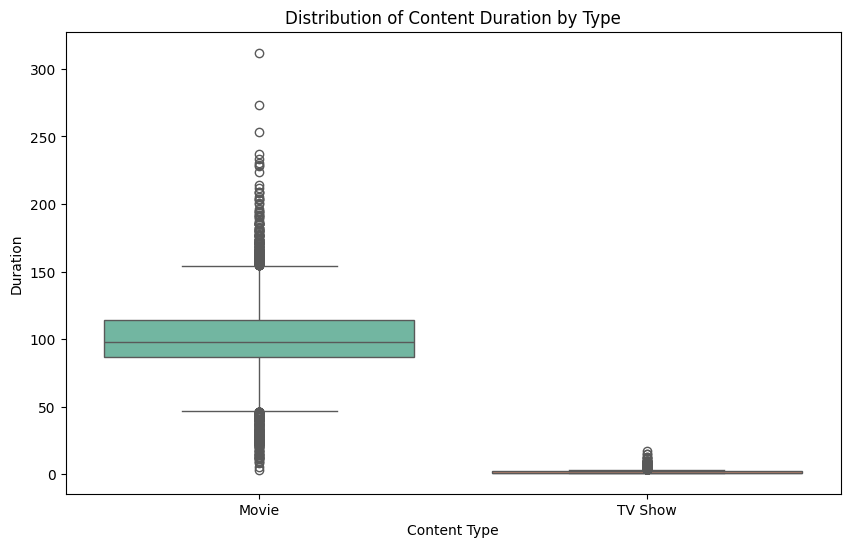

In [36]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='content_type', y='duration', data=df, palette='Set2')
plt.title('Distribution of Content Duration by Type')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.show()

#### Directors with Most Titles

C:\Users\adham\AppData\Local\Temp\ipykernel_29416\4179448429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_directors.index, x=top_directors.values, palette='spring')


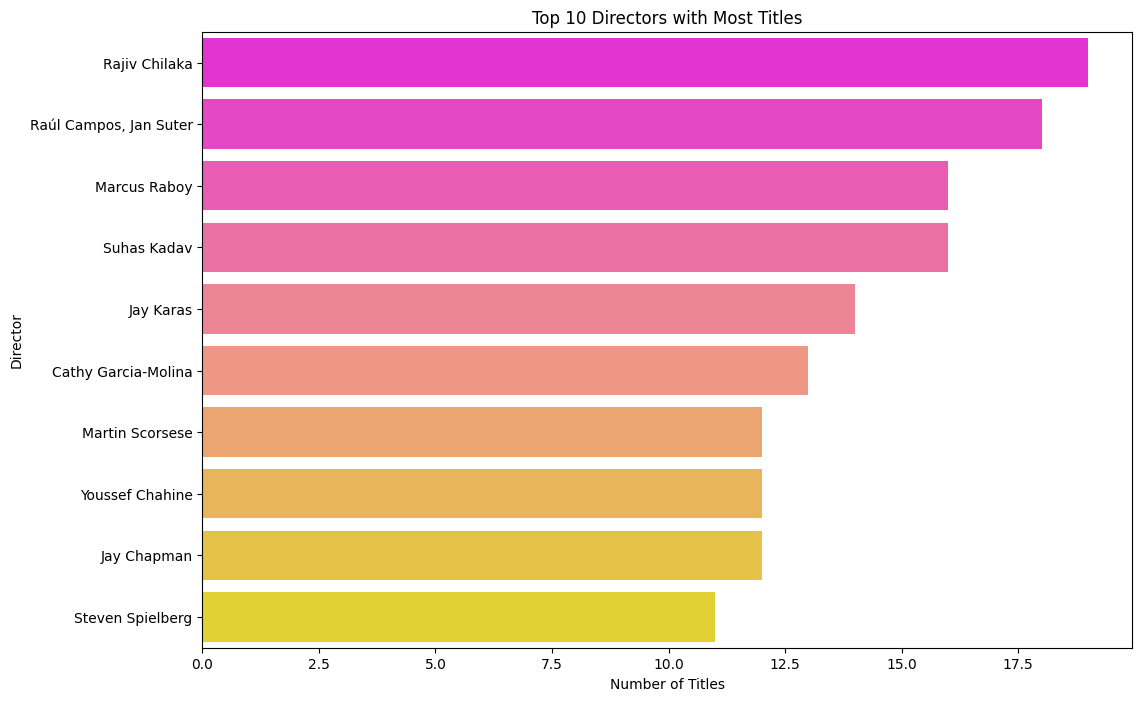

In [37]:
plt.figure(figsize=(12, 8))
top_directors = df['director'].value_counts().head(10)
sns.barplot(y=top_directors.index, x=top_directors.values, palette='spring')
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

#### Top Cast Members


C:\Users\adham\AppData\Local\Temp\ipykernel_29416\296254203.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cast_members.index, x=cast_members.values, palette='autumn')


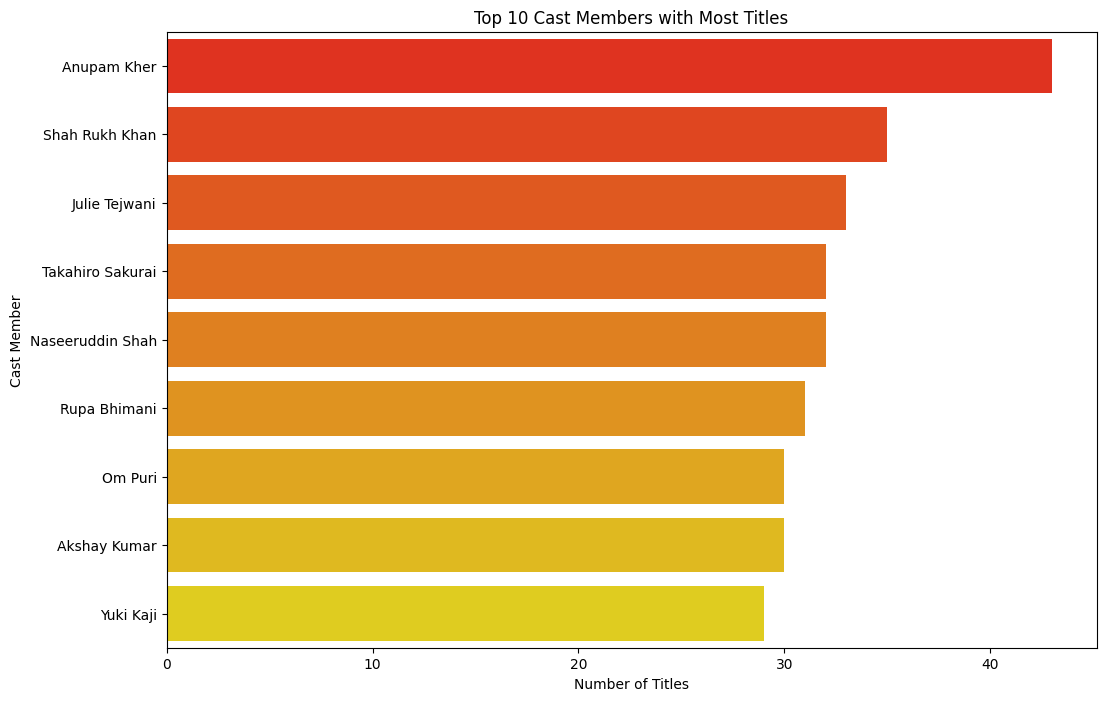

In [38]:
plt.figure(figsize=(12, 8))
cast_members = df['cast'].str.split(', ', expand=True).stack().value_counts().head(10)
cast_members = cast_members.drop('No Cast')
sns.barplot(y=cast_members.index, x=cast_members.values, palette='autumn')
plt.title('Top 10 Cast Members with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Cast Member')
plt.show()


#### Genres Distribution


C:\Users\adham\AppData\Local\Temp\ipykernel_29416\1372786243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genres.index, x=genres.values, palette='winter')


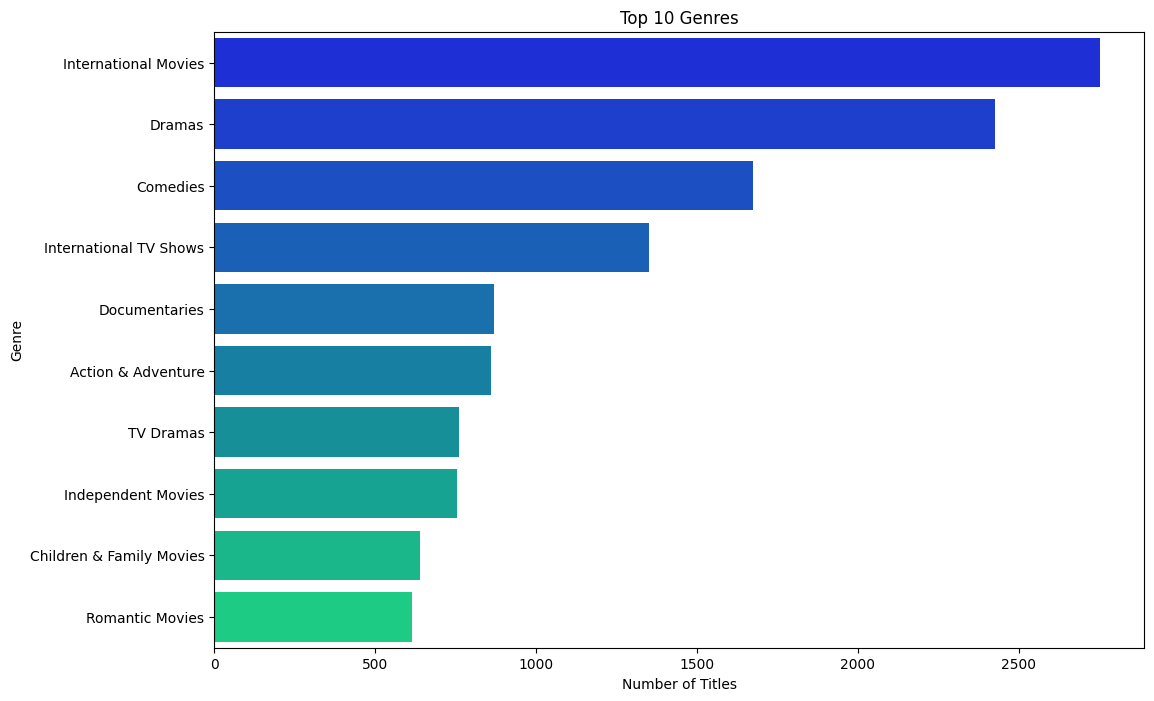

In [39]:
plt.figure(figsize=(12, 8))
genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
sns.barplot(y=genres.index, x=genres.values, palette='winter')
plt.title('Top 10 Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()